# Buck Converter with L-C input filter

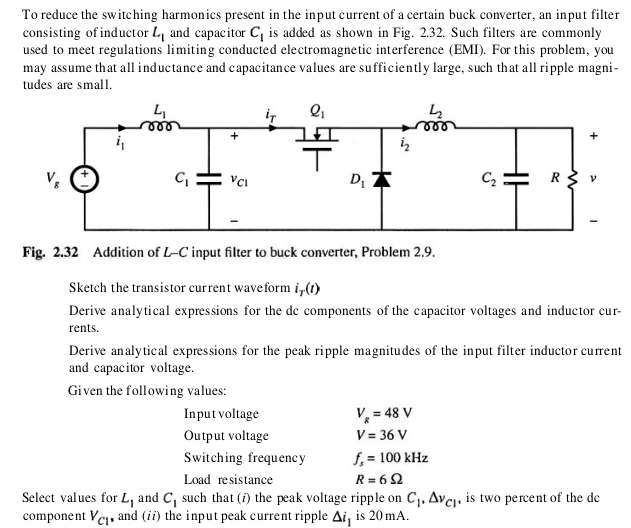

In [18]:

import sympy
from sympy.core.symbol import symbols, Symbol

from sympy.printing import latex, pprint
from sympy import Symbol, simplify
from sympy import dsolve, Function, Derivative, integrate, diff
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, EngFormatter

from math import log10
from PyLTSpice import LTSpice_RawRead

import logging
from ipywidgets import FloatSlider, interact, interactive
from converter5 import *

In [ ]:
logformat = '{asctime}\n{message}'
logger = logging.getLogger(__name__)
if logger.hasHandlers():
    #handlers somehow stay alive even after restarting iPython
    #console and clearing variables
    logger.handlers.clear()

logger.setLevel('DEBUG')
print(logger)
print(__name__)
# Use FileHandler() to log to a file
file_handler = logging.FileHandler('Problem2-9.log', mode='w')
formatter = logging.Formatter(fmt=logformat, style='{' )
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

In [ ]:
def make_symbols():
    global R, C1, L1, C2, L2 
    global iR, Vc1, Vc2, iL1, iL2, Vg, iin
    global delta_iL1, delta_vC1, delta_iL2, delta_vC2
    global D, fs, M, Ts
    
    R = variable('R', 'ohms', real=True, positive=True)
    C1 = variable('C_1', 'F', real=True, positive=True)
    C2 = variable('C_2', 'F', None, real=True, positive=True)
    L1 = variable('L1', 'H', real=True, positive=True)
    Lf = variable('Lf', 'H', real=True, positive=True)
    
    Vc1 = variable('V_C1', 'V', real=True)
    Vc2 = variable('V_C2', 'V', real=True)
    
    iL1 = variable('i_L1', 'A', real=True)
    iL2 = variable('i_L2', 'A', real=True)
    iR = variable('i_R', 'A', real=True)
    
    Vg = variable('V_g', 'V', real= True)
    iin = variable('i_in', 'A', real=True)
    
    delta_iL1 = variable('\Delta i_L1', 'A', 'delta_iL', real=True)
    delta_vC1 = variable('\Delta v_C1', 'V', 'detla_vC', real=True)
    delta_iL2 = variable('\Delta i_L2', 'A', 'delta_iL', real=True)
    delta_vC2 = variable('\Delta v_C2', 'V', 'detla_vC', real=True)
    
    M = variable('M', real=True)
    D = variable('D', '%', real=True, positive=True)
    fs = variable('f_s', 'Hz', real=True, positive=True)
    
    return
make_symbols()

In [ ]:
buck = converter() 

### The small-ripple approximation, applied to the input filter, predicts zero L1 ripple current. This is because both side of the inductor are connected to DC nodes. C1 does see different currents between parts of the cycle: L1 current for 0<t<DTs, and L1 + L2 current for DTs < t < Ts. 

In [53]:
Lf = 1#symbols('L_f')
L1 = 1#symbols('L_1')
Cf = 1#symbols('C_f')
Cb = 1#symbols('C_b')
Vg = 1#symbols('V_g')
Rf = 1#symbols('R_f')
Rl = 1#symbols('R_l')
C1 = 1
i1 = Function('i1')
i2 = Function('i2')
i3 = Function('i3')
i4 = Function('i4')
t = symbols('t')

eq1 = -Vg + Lf*Derivative(i1(t))+ (1/Cf)*integrate(i1(t), t) -(1/Cf)*integrate(i2(t), t)
eq5 = diff(eq1,t)
eq2 = -(1/Cf)*integrate(i1(t), t) + (1/Cf)*integrate(i2(t), t) + (i2(t) - i3(t))*Rf + (1/Cb)*integrate(i2(t), t)- (1/Cb)*integrate(i3(t), t)
eq6 = diff(eq2,t)
eq3 = -(1/Cb)*integrate(i3(t), t)+(1/Cb)*integrate(i2(t), t) -(i3(t)-i2(t))*Rf + L1*Derivative(i3(t),t) +(1/C1)*integrate(i3(t), t) - (1/C1)*integrate(i4(t), t)  
eq7 = diff(eq3, t)
eq4 = -(1/C1)*integrate(i4(t), t) + (1/Cb)*integrate(i3(t), t)+i4(t)*Rl
eq8= diff(eq4,t)

In [56]:
display(eq1)
display(eq2)
display(eq3)
display(eq4)

Derivative(i1(t), t) + 1.0*Integral(i1(t), t) - 1.0*Integral(i2(t), t) - 1

i2(t) - i3(t) - 1.0*Integral(i1(t), t) + 2.0*Integral(i2(t), t) - 1.0*Integral(i3(t), t)

i2(t) - i3(t) + Derivative(i3(t), t) + 1.0*Integral(i2(t), t) - 1.0*Integral(i4(t), t)

i4(t) + 1.0*Integral(i3(t), t) - 1.0*Integral(i4(t), t)

In [54]:
display(eq5)
display(eq6)
display(eq7)
display(eq8)

1.0*i1(t) - 1.0*i2(t) + Derivative(i1(t), (t, 2))

-1.0*i1(t) + 2.0*i2(t) - 1.0*i3(t) + Derivative(i2(t), t) - Derivative(i3(t), t)

1.0*i2(t) - 1.0*i4(t) + Derivative(i2(t), t) - Derivative(i3(t), t) + Derivative(i3(t), (t, 2))

1.0*i3(t) - 1.0*i4(t) + Derivative(i4(t), t)

In [43]:
eq1 = -Vg + Lf*diff(i1,t)+ (*integrate(i1, t) -*integrate(i2, t)
eq2 = -*integrate(i1, t) + *integrate(i2, t) + (i2 - i3)+ integrate(i2, t)- *integrate(i3, t)
eq3 = -*integrate(i3, t)+*integrate(i2, t) -(i3-i2)*Rf + L1*diff(i3,t) +*integrate(i3, t) - *integrate(i4, t)  
eq4 = -*integrate(i4, t) + *integrate(i3, t)+i4

(t,)

In [55]:
dsolve([eq5, eq6, eq7, eq8])

MatrixError: Jordan normal form is not implemented if the matrix have eigenvalues in CRootOf form

In [ ]:
iL1 = Function('iL1')
t = symbols('t')
x = symbols('x')
eq = Derivative(iL1(t),t)*(L1*C1)+iL1(t)*t
myprint2(eq)

In [ ]:
iL1 = dsolve(eq, ics={iL1(0):5}).rhs
myprint(Function('iL1')(t), iL1)

In [ ]:
iL1_eq = dsolve(eq, ics={iL1(0):5})
#myprint(iL1_eq.lhs, iL1_eq.rhs)
myprint(iL1(t), iL1_eq.rhs)

In [ ]:
myprint(Function('vC1')(t), Vg + (iL1(t)/C1)*t)

In [ ]:
diL2 / dt  = [vc1(t) - vc2(t)] / L

In [ ]:
vc2(t) = q / C2
 = iL2(t) * t / C2 for 0 < t < dTs

#### The output inductor is sketched below. 

In [ ]:
with plt.xkcd():
    r = .1 
    dc = .5
    #ts = 200
    t = 1
    d = .3
    m1 = (r*2)/d
    m2 = (r*2)/(1-d)
    
    #x = np.tile(np.linspace(0, 3, 3), r)
    x = np.array([0, d, 1])
    xt = np.append(x, x+1)
    
    #y = np.append((m*x)[:int(ts/2)], (-m*x)[int(ts/2):]+m*x[-2]) + (dc-m*x[int(ts/4)])
    #y = np.array([dc - m1*1/2, dc + m1*1/2, dc-m2*1/2 ] )
    y = np.array([dc - m1*d/2, dc + m1*d/2, dc-m2*(1-d)/2 ] )
    fig, ax = plt.subplots(subplot_kw={'title':' Output Inductor Current Ripple'})
    ax.set_xticks([0, d, 1])
    ax.set_xticklabels([r'$0$', r'$DT_s$', r'$T_s$'])
    ax.set_yticks([dc])
    ax.set_yticklabels([r'$I_{L1}$'])
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 1.2])
    ax.set_ylabel(r'$i_{L2}(t)$', y=.8,horizontalalignment='right', rotation=0)
    ax.plot(xt, np.tile(y,2))
    ax.plot(xt, dc*np.ones(6))
    ax.annotate("",
                xy=(0, y[0]), xycoords='data',
                xytext=(d/2, dc), textcoords='data',
                arrowprops=dict(arrowstyle="-", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="angle,angleA=-90,angleB=180,rad=0",
                                ),
                )
    ax.annotate("",
            xy=(d, y[1]), xycoords='data',
            #xy=(t/2, max(y)), xycoords='data',
            xytext=((d+(1-d)/2), dc), textcoords='data',
            arrowprops=dict(arrowstyle="-", color="0.5",
                            shrinkA=5, shrinkB=5,
                            patchA=None, patchB=None,
                            connectionstyle="angle,angleA=90,angleB=180,rad=0",
                            ),
            )
    #ax.text(t*(1+.05)/4, y[0]*.95, r'$(V_g-V)/L_1$')
    ax.text((d/2)*(1+.05), y[0]*.8, r'$\frac {V_{C1}-V_{C2}} {L_2}$', fontsize='x-large')
    ax.text((d+(1-d)/2)*(1+.05), y[1]*1, r'$\frac {-V_{C2}} {L_2}$', fontsize='x-large')

#### Assume all the inductor current ripple (the ac component of the inductor) goes through the output capacitor. This assumption relies on the impedance of the output capactor to be much less the the load resistance. The output capacitor voltage ripple is then found as follows: